# NER

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Taylortop.csv')

In [3]:
#pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [5]:
def preprocess_text(text):
    text = str(text)
    text = re.sub('\d+', '', text)
    text = text.lower()

    lemmatizer = WordNetLemmatizer()
    w_tokenizer = TweetTokenizer()
    lemmatized_text = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    text_no_punct = [re.sub(r'[^\w\s]', '', word) for word in lemmatized_text if re.sub(r'[^\w\s]', '', word) != '']

    return text_no_punct

In [6]:
columns_to_clean = ['subreddit', 'title', 'selftext', 'author', 'link']  #  colonne da pulire
for column in columns_to_clean:
    df[column + '_proc'] = df[column].apply(preprocess_text)

stop_words = set(stopwords.words('english'))
for column in columns_to_clean:
    df[column + '_proc'] = df[column + '_proc'].apply(lambda x: [item for item in x if item not in stop_words])

In [7]:
df.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,author,created,id,link,subreddit_proc,title_proc,selftext_proc,author_proc,link_proc
0,TaylorSwift,Taylor and Travis after the concert,NaN,0.78,21339,0,21339,Writher_inthedark,2023-11-12 04:18:05,17tbd67,t3_17tbd67,[taylorswift],"[taylor, travis, concert]",[nan],[writher_inthedark],[t_tbd]
1,TaylorSwift,Taylor &amp; Travis In NYC,NaN,0.81,14009,0,14009,betty-estes,2023-10-15 06:45:28,1787rtm,t3_1787rtm,[taylorswift],"[taylor, travis, nyc]",[nan],[bettyestes],[t_rtm]
2,TaylorSwift,Taylor Swift is at the Chiefs game with Mama K...,Discuss.,0.81,11183,0,11183,3WordPosts,2023-09-24 22:24:45,16r7qq4,t3_16r7qq4,[taylorswift],"[taylor, swift, chief, game, mama, kelce]",[discus],[wordposts],[t_rqq]
3,TaylorSwift,Canadian Prime Minister Justin Trudeau sends a...,NaN,0.91,10571,0,10571,seakucumber,2023-07-06 03:57:09,14ruh6w,t3_14ruh6w,[taylorswift],"[canadian, prime, minister, justin, trudeau, s...",[nan],[seakucumber],[t_ruhw]
4,TaylorSwift,"Travis and Scott's reaction to ""Karma is the g...",NaN,0.90,10278,0,10278,icoulddance,2023-11-12 06:13:09,17td7lo,t3_17td7lo,[taylorswift],"[travis, scotts, reaction, karma, guy, chief]",[nan],[icoulddance],[t_tdlo]


# NER

In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def preprocess(title_list):
    title = ' '.join(title_list)
    sent = nltk.word_tokenize(title)
    sent = nltk.pos_tag(sent)
    return sent

for index, row in df.iterrows():
    title_proc = row['title_proc']

    if isinstance(title_proc, list):
        sent = preprocess(title_proc)

        words = [word for word, _ in sent]

        ne_tree = ne_chunk(pos_tag(words))
        print(f"Title_proc: {title_proc}")
        print(ne_tree)
        print("------")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Output streaming troncato alle ultime 5000 righe.
  folklore/RB
  evermore/RB
  genre/NN
  would/MD
  name/VB)
------
Title_proc: ['swiftie', 'local', 'target', 'put', 'friendship', 'bracelet', 'cd']
(S
  swiftie/JJ
  local/JJ
  target/NN
  put/VBD
  friendship/JJ
  bracelet/NN
  cd/NN)
------
Title_proc: ['taylor', 'give', 'hat', 'sister', 'victim', 'nashville', 'school', 'shooting']
(S
  taylor/NN
  give/VB
  hat/WP
  sister/JJR
  victim/NN
  nashville/JJ
  school/NN
  shooting/VBG)
------
Title_proc: ['taylor', 'swift', 'fan', 'dy', 'falling', 'ill', 'concert', 'rio', 'de', 'janeiro']
(S
  taylor/NN
  swift/NN
  fan/NN
  dy/NN
  falling/VBG
  ill/JJ
  concert/NN
  rio/NN
  de/IN
  janeiro/NN)
------
Title_proc: ['fan', 'outside', 'wedding', 'never', 'seen', 'people', 'crowd', 'bad', 'guy', 'think', 'team', 'release', 'statement']
(S
  fan/NN
  outside/IN
  wedding/VBG
  never/RB
  seen/VBN
  people/NNS
  crowd/VBP
  bad/JJ
  guy/NN
  think/VBP
  team/NN
  release/NN
  statement/NN)


In [ ]:
#Contare le Entità più Frequenti:

In [9]:
from collections import Counter

def extract_entities(title_proc_list):

    title_proc = ' '.join(title_proc_list)

    # Estrarre solo i sostantivi (NN) dalle entità nominate
    entities = [entity for entity in ne_chunk(pos_tag(word_tokenize(title_proc))).leaves() if entity[1] == 'NN']

    return entities


all_entities = [entity for title_proc_list in df['title_proc'] for entity in extract_entities(title_proc_list)]

#entità più frequenti
entity_counter = Counter(all_entities)


top_entities = entity_counter.most_common(10)
print("Top 10 Entità più Comuni:")
for entity, count in top_entities:
    print(f"{entity}: {count}")

Top 10 Entità più Comuni:
('taylor', 'NN'): 492
('swift', 'NN'): 162
('era', 'NN'): 83
('tour', 'NN'): 81
('version', 'NN'): 72
('year', 'NN'): 41
('travis', 'NN'): 37
('concert', 'NN'): 37
('song', 'NN'): 36
('ha', 'NN'): 36


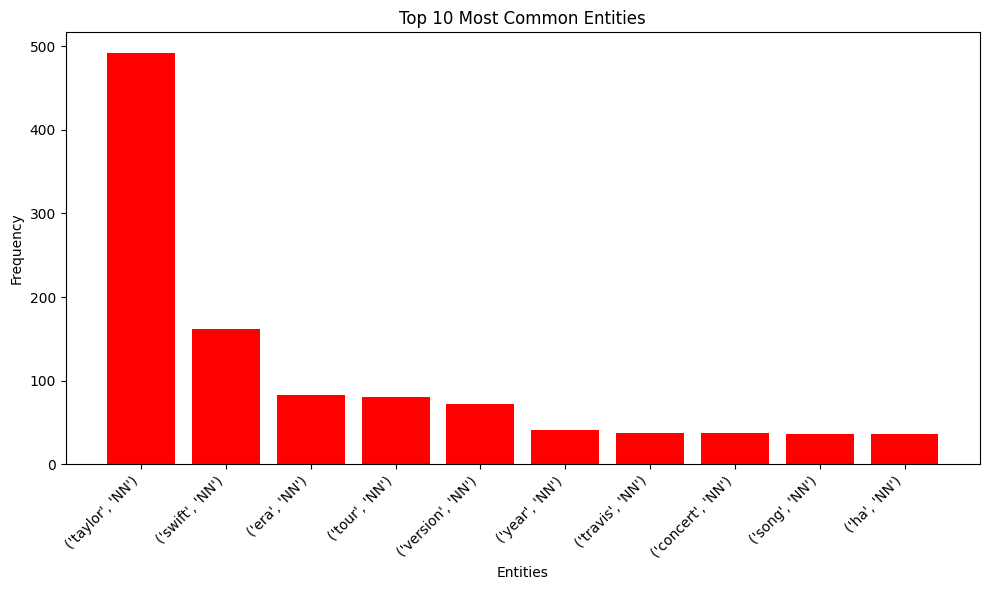

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

def extract_entities(title_list):
    title = ' '.join(title_list)

    entities = [entity for entity in ne_chunk(pos_tag(word_tokenize(title))).leaves() if entity[1] == 'NN']

    return entities

all_entities = [entity for title_proc_list in df['title_proc'] for entity in extract_entities(title_proc_list)]

entity_counter = Counter(all_entities)

top_entities = entity_counter.most_common(10)

entities, counts = zip(*top_entities)

ind = range(len(entities))

plt.figure(figsize=(10, 6))
plt.bar(ind, counts, color ='red')
plt.xticks(ind, entities, rotation=45, ha="right")
plt.title('Top 10 Most Common Entities')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




In [ ]:
#Analisi delle Categorie di Entità:


In [ ]:
from collections import Counter
from nltk import ne_chunk, pos_tag, word_tokenize

def extract_entities(title_proc_list):
    # Unire le stringhe nella lista in un'unica stringa
    title_proc = ' '.join(title_proc_list)

    # Estrarre solo i sostantivi (NN) dalle entità nominate
    entities = [entity for entity in ne_chunk(pos_tag(word_tokenize(title_proc))).leaves() if entity[1] == 'NN']

    return entities

# Creare un dizionario per contare le entità per categoria di subreddit
entity_per_subreddit_counter = Counter()

# Estrarre e contare le entità per categoria di subreddit utilizzando title_proc
for index, row in df.iterrows():
    subreddit = row['subreddit']
    title_proc_list = row['title_proc']
    entities = [entity for entity in extract_entities(title_proc_list)]

    # Generare la chiave unica combinando subreddit e le rappresentazioni di stringa delle entità
    key = f"{subreddit}_{str(entities)}"
    entity_per_subreddit_counter.update({key: 1})

# Visualizzare le combinazioni più comuni di entità e subreddit
top_entity_subreddit_combinations = entity_per_subreddit_counter.most_common()
print("Combinazioni più Comuni di Entità e Subreddit:")
for combination, count in top_entity_subreddit_combinations:
    print(f"{combination}: {count}")




Combinazioni più Comuni di Entità e Subreddit:
TaylorSwift_[]: 17
TaylorSwift_[('taylor', 'NN'), ('travis', 'NN'), ('game', 'NN')]: 3
TaylorSwift_[('taylor', 'NN'), ('version', 'NN')]: 3
TaylorSwift_[('taylor', 'NN'), ('game', 'NN'), ('today', 'NN')]: 3
TaylorSwift_[('speak', 'NN')]: 3
TaylorSwift_[('taylor', 'NN')]: 3
TaylorSwift_[('taylor', 'NN'), ('travis', 'NN'), ('nyc', 'NN')]: 2
TaylorSwift_[('taylor', 'NN'), ('nyc', 'NN'), ('tonight', 'NN')]: 2
TaylorSwift_[('taylor', 'NN'), ('lady', 'NN'), ('studio', 'NN')]: 2
TaylorSwift_[('outfit', 'NN')]: 2
TaylorSwift_[('version', 'NN')]: 2
TaylorSwift_[('stage', 'NN')]: 2
TaylorSwift_[('taylor', 'NN'), ('tonight', 'NN')]: 2
TaylorSwift_[('taylor', 'NN'), ('food', 'NN'), ('bank', 'NN'), ('travel', 'NN'), ('tour', 'NN')]: 2
TaylorSwift_[('tour', 'NN'), ('poster', 'NN')]: 2
TaylorSwift_[('girlfriend', 'NN')]: 2
TaylorSwift_[('taylor', 'NN'), ('swift', 'NN')]: 2
TaylorSwift_[('taylor', 'NN'), ('version', 'NN'), ('announcement', 'NN')]: 2
Taylo

In [ ]:
#Ogni riga rappresenta una combinazione di subreddit ed entità,
#con il numero di occorrenze indicate alla fine. Ad esempio,
#"TaylorSwift_[('taylor', 'NN'), ('travis', 'NN'), ('game', 'NN')]: 3"
#indica che la combinazione di entità ('taylor', 'NN'), ('travis', 'NN'), ('game', 'NN')
#è stata osservata 3 volte nel subreddit "TaylorSwift".

## spacy


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

# Funzione per l'analisi delle entità con spaCy
def spacy_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Unisci tutte le stringhe nella lista in una singola stringa
df['title_proc_combined'] = df['title_proc'].apply(' '.join)

# Applica la funzione al DataFrame utilizzando la colonna 'title_proc_combined'
df['spacy_entities'] = df['title_proc_combined'].apply(lambda x: spacy_named_entities(x))

# Mostra il DataFrame con le nuove entità
print(df[['title_proc_combined', 'spacy_entities']])


                                   title_proc_combined  \
0                                taylor travis concert   
1                                    taylor travis nyc   
2                   taylor swift chief game mama kelce   
3    canadian prime minister justin trudeau sends m...   
4               travis scotts reaction karma guy chief   
..                                                 ...   
972                        taylor thanks argentina fan   
973                                     warsaw tonight   
974                                era movie etiquette   
975  found community thought id share loverinspired...   
976                  finished jacket tour original art   

                                        spacy_entities  
0                                   [(taylor, PERSON)]  
1                                   [(taylor, PERSON)]  
2                                   [(taylor, PERSON)]  
3    [(canadian, NORP), (justin trudeau, PERSON), (...  
4            [(tra

In [ ]:
from collections import Counter

all_entities = [ent[0] for entities in df['spacy_entities'] for ent in entities]

entity_counter = Counter(all_entities)

total_entities = len(all_entities)
print(f"Total number of entities: {total_entities}")

most_common_entities = entity_counter.most_common(10)
print("Most frequent entities:")
for entity, count in most_common_entities:
    print(f"{entity}: {count}")


Total number of entities: 1056
Most frequent entities:
taylor: 500
tonight: 30
today: 26
one: 23
first: 20
midnight: 17
last night: 16
night: 9
year: 9
travis kelce: 8


## dandelion

In [ ]:
!pip install Theano


  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668124 sha256=3cc44f3942f08247d3c11566a6889043ee2ec9eed5f0869de53d537b6801a53b
  Stored in directory: c:\users\loren\appdata\local\pip\cache\wheels\12\d8\36\e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built Theano


In [ ]:
from dandelion import DataTXT

# Replace 'your_dandelion_token' with your actual Dandelion API token
dandelion_token = '1df84ecb3b084f69992a7d6c83313835'
datatxt = DataTXT(app_id=dandelion_token, app_key=dandelion_token)

def extract_entities(text):
    response = datatxt.nex(text)
    entities = [(annotation['label'], annotation['spot']) for annotation in response.annotations]
    return entities

df['dandelion_entities'] = df['title_proc'].apply(extract_entities)

print(df[['title_proc', 'dandelion_entities']])


AttributeError: partially initialized module 'theano' has no attribute 'compile' (most likely due to a circular import)

In [ ]:
1df84ecb3b084f69992a7d6c83313835

In [ ]:
!conda install m2w64-toolchain


^C


In [ ]:
#!pip install --upgrade Theano


In [ ]:
#!pip install --upgrade numpy


ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\Loren\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
!pip install numpy==1.19.5


  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3


ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\Loren\\anaconda3\\Lib\\site-packages\\~~mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
pip install theano==1.0.5


  Using cached numpy-1.26.3-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.3 which is incompatible.


# babelfy

In [ ]:
!pip install babelpy


In [ ]:
from babelpy.babelfy import BabelfyClient
import pandas as pd
babel_token = "c4827612-47f6-4fc0-9e5c-b6365871a7ab"

In [ ]:
babel_token = '43f61ad2-374e-4f33-94da-2f60431f3d6e'

In [ ]:
LANG = 'EN'

def apply_babelfy_to_text(text):
    params = dict()
    params['lang'] = LANG
    entities_list = []

    babel_client = BabelfyClient(babel_token, params)

    babel_client.babelfy(text)

    try:
        entities_list = babel_client.entities
    except AttributeError as e:
        print(f"Errore: {e}. Risposta non gestita: {babel_client._data}")

    return entities_list

df['babel_entities'] = df['title'].apply(apply_babelfy_to_text)

print(df)


       subreddit                                              title  \
0    TaylorSwift                Taylor and Travis after the concert   
1    TaylorSwift                         Taylor &amp; Travis In NYC   
2    TaylorSwift  Taylor Swift is at the Chiefs game with Mama K...   
3    TaylorSwift  Canadian Prime Minister Justin Trudeau sends a...   
4    TaylorSwift  Travis and Scott's reaction to "Karma is the g...   
..           ...                                                ...   
972  TaylorSwift                       Taylor thanks Argentina fans   
973  TaylorSwift                                     Warsaw tonight   
974  TaylorSwift                               Eras Movie Etiquette   
975  TaylorSwift  Just found this community and thought I'd shar...   
976  TaylorSwift  Finished my jacket for the tour! All original ...   

                                              selftext  upvote_ratio    ups  \
0                                                  NaN          0.78

In [ ]:
# Stampa le entità ottenute
print("Entities:")
print(df['babel_entities'])


Entities:
0      [{'start': 11, 'end': 16, 'text': 'Travis', 'i...
1      [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
2      [{'start': 0, 'end': 11, 'text': 'Taylor Swift...
3      [{'start': 0, 'end': 7, 'text': 'Canadian', 'i...
4      [{'start': 11, 'end': 15, 'text': 'Scott', 'is...
                             ...                        
972    [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
973    [{'start': 0, 'end': 5, 'text': 'Warsaw', 'isE...
974    [{'start': 0, 'end': 3, 'text': 'Eras', 'isEnt...
975    [{'start': 5, 'end': 9, 'text': 'found', 'isEn...
976    [{'start': 12, 'end': 17, 'text': 'jacket', 'i...
Name: babel_entities, Length: 977, dtype: object


In [ ]:
# Stampa tutte le entità unite (all merged entities)
print("All Merged Entities:")
print(df['babel_entities'].apply(lambda x: babel_client.all_merged_entities))

In [ ]:
# Stampa gli URL di DBpedia e BabelNet per ogni entità
for entities in df['babel_entities']:
    for e in entities:
        if "DBpediaURL" in e:
            print(f"{e['text']}:\t{e['DBpediaURL']}")
        if "BabelNetURL" in e:
            print(f"{e['text']}:\t{e['BabelNetURL']}")


Travis:	http://dbpedia.org/resource/Travis_(band)
Travis:	http://babelnet.org/rdf/s02903702n
concert:	http://dbpedia.org/resource/Concert
concert:	http://babelnet.org/rdf/s00021559n
Taylor:	http://dbpedia.org/resource/Deems_Taylor
Taylor:	http://babelnet.org/rdf/s00025809n
Travis:	http://dbpedia.org/resource/Travis_(band)
Travis:	http://babelnet.org/rdf/s02903702n
NYC:	http://dbpedia.org/resource/New_York_City
NYC:	http://babelnet.org/rdf/s00041611n
Taylor Swift:	http://dbpedia.org/resource/Taylor_Swift
Taylor Swift:	http://babelnet.org/rdf/s03340244n
Chiefs:	http://dbpedia.org/resource/Scottish_clan_chief
Chiefs:	http://babelnet.org/rdf/s00018320n
game:	http://dbpedia.org/resource/Game
game:	http://babelnet.org/rdf/s00037180n
Mama:	http://dbpedia.org/resource/I_Still_Believe_(album)
Mama:	http://babelnet.org/rdf/s01985623n
Canadian:	http://dbpedia.org/resource/Canadians
Canadian:	http://babelnet.org/rdf/s00015125n
Canadian Prime Minister:	http://dbpedia.org/resource/Prime_Minister_of_

April:	http://dbpedia.org/resource/April
April:	http://babelnet.org/rdf/s00005169n
April 23rd:	http://dbpedia.org/resource/April_23
April 23rd:	http://babelnet.org/rdf/s01067256n
23rd:	
23rd:	http://babelnet.org/rdf/s00095961a
Stop:	
Stop:	http://babelnet.org/rdf/s00042697n
trying:	
trying:	http://babelnet.org/rdf/s00087731v
beef:	http://dbpedia.org/resource/Beef_cattle
beef:	http://babelnet.org/rdf/s00009543n
happen:	
happen:	http://babelnet.org/rdf/s00083286v
happen:	
happen:	http://babelnet.org/rdf/s00083286v
Rumor:	http://dbpedia.org/resource/Hearsay
Rumor:	http://babelnet.org/rdf/s00043378n
Lover:	
Lover:	http://babelnet.org/rdf/s00052143n
Vault:	http://dbpedia.org/resource/Burial_vault_(tomb)
Vault:	http://babelnet.org/rdf/s00013985n
reportedly:	
reportedly:	http://babelnet.org/rdf/s00116829r
released:	
released:	http://babelnet.org/rdf/s00088544v
Friday:	http://dbpedia.org/resource/Friday
Friday:	http://babelnet.org/rdf/s00036512n
according:	
according:	http://babelnet.org/rdf/s

leading:	http://babelnet.org/rdf/s00089260v
No.:	http://dbpedia.org/resource/Ordinal_number
No.:	http://babelnet.org/rdf/s00057820n
No. 1:	http://dbpedia.org/resource/Tuple
No. 1:	http://babelnet.org/rdf/s00000005n
total:	
total:	http://babelnet.org/rdf/s00103392a
weeks:	http://dbpedia.org/resource/Week
weeks:	http://babelnet.org/rdf/s00043484n
mentions:	
mentions:	http://babelnet.org/rdf/s00082412v
Taylor:	http://dbpedia.org/resource/Taylor_sept
Taylor:	http://babelnet.org/rdf/s03653200n
dancers:	http://dbpedia.org/resource/Dance
dancers:	http://babelnet.org/rdf/s00025144n
reaction:	http://dbpedia.org/resource/Chemical_reaction
reaction:	http://babelnet.org/rdf/s00018121n
karma:	http://dbpedia.org/resource/Karma_(story)
karma:	http://babelnet.org/rdf/s02388982n
guy:	
guy:	http://babelnet.org/rdf/s00042306n
chiefs:	http://dbpedia.org/resource/Scottish_clan_chief
chiefs:	http://babelnet.org/rdf/s00018320n
Happy:	http://dbpedia.org/resource/Happiness
Happy:	http://babelnet.org/rdf/s00042

Dates:	http://babelnet.org/rdf/s00005111n
British:	http://dbpedia.org/resource/British_people
British:	http://babelnet.org/rdf/s00013176n
British Columbia:	http://dbpedia.org/resource/British_Columbia
British Columbia:	http://babelnet.org/rdf/s00013180n
Columbia:	
Columbia:	http://babelnet.org/rdf/s00020817n
sides:	http://dbpedia.org/resource/A-side_and_B-side
sides:	http://babelnet.org/rdf/s00789882n
Enchanted:	http://dbpedia.org/resource/Speak_Now
Enchanted:	http://babelnet.org/rdf/s02172973n
tried:	
tried:	http://babelnet.org/rdf/s00087731v
best:	
best:	http://babelnet.org/rdf/s00098274a
replicating:	
replicating:	http://babelnet.org/rdf/s00085806v
look:	http://dbpedia.org/resource/Looking
look:	http://babelnet.org/rdf/s00051968n
party:	http://dbpedia.org/resource/Political_party
party:	http://babelnet.org/rdf/s00060834n
watching:	
watching:	http://babelnet.org/rdf/s00095665v
See:	http://dbpedia.org/resource/See_(album)
See:	http://babelnet.org/rdf/s00552106n
music:	http://dbpedia.o

surprise:	
surprise:	http://babelnet.org/rdf/s00075412n
songs:	http://dbpedia.org/resource/Song
songs:	http://babelnet.org/rdf/s00072794n
fair:	
fair:	http://babelnet.org/rdf/s00102720a
fair game:	http://dbpedia.org/resource/Fair_Game_(Scientology)
fair game:	http://babelnet.org/rdf/s01306119n
game:	http://dbpedia.org/resource/Game
game:	http://babelnet.org/rdf/s00037180n
touring:	
touring:	http://babelnet.org/rdf/s00095049v
resumes:	http://dbpedia.org/resource/Résumé
resumes:	http://babelnet.org/rdf/s02820496n
Did:	http://dbpedia.org/resource/Dodecadodecahedron
Did:	http://babelnet.org/rdf/s03151917n
Age:	http://dbpedia.org/resource/Aging_of_wine
Age:	http://babelnet.org/rdf/s00001936n
Age Well:	http://dbpedia.org/resource/Aging_of_wine
Age Well:	http://babelnet.org/rdf/s00076979n
posted:	
posted:	http://babelnet.org/rdf/s00091875v
Tiktok:	http://dbpedia.org/resource/Tiktok
Tiktok:	http://babelnet.org/rdf/s16496485n
lip:	http://dbpedia.org/resource/Lip
lip:	http://babelnet.org/rdf/s00

Throw:	
Throw:	http://babelnet.org/rdf/s00077093n
Objects:	http://dbpedia.org/resource/Physical_body
Objects:	http://babelnet.org/rdf/s00058442n
Stage:	
Stage:	http://babelnet.org/rdf/s00061898n
Aires:	http://dbpedia.org/resource/Aire_(Pablo_Ruiz_album)
Aires:	http://babelnet.org/rdf/s02592977n
Concert:	http://dbpedia.org/resource/Concert
Concert:	http://babelnet.org/rdf/s00021559n
Freaks:	http://dbpedia.org/resource/Freak
Freaks:	http://babelnet.org/rdf/s00036308n
credited:	
credited:	http://babelnet.org/rdf/s00086017v
executive:	http://dbpedia.org/resource/Executive_director
executive:	http://babelnet.org/rdf/s00032179n
executive producer:	http://dbpedia.org/resource/Executive_producer
executive producer:	http://babelnet.org/rdf/s03230153n
producer:	http://dbpedia.org/resource/Hip_hop_production
producer:	http://babelnet.org/rdf/s00053285n
Version:	
Version:	http://babelnet.org/rdf/s00079827n
Christopher:	http://dbpedia.org/resource/Sleep_(rapper)
Christopher:	http://babelnet.org/rdf

In [ ]:
LANG = 'EN'

def apply_babelfy_to_text(text):
    params = dict()
    params['lang'] = LANG  # Assicurati che la variabile LANG sia definita
    entities_info = {}

    # Crea un'istanza del client Babelfy
    babel_client = BabelfyClient(babel_token, params)

    # Esegue la chiamata Babelfy
    babel_client.babelfy(text)

    try:
        # Tenta di ottenere le entità e aggiungerle alla lista
        entities_info['entities'] = babel_client.entities
        entities_info['all_entities'] = babel_client.all_entities[0]
        entities_info['merged_entities'] = babel_client.merged_entities
        entities_info['all_merged_entities'] = babel_client.all_merged_entities
    except AttributeError as e:
        # Gestisce il caso in cui la risposta non sia nel formato atteso
        print(f"Errore: {e}. Risposta non gestita: {babel_client._data}")

    # Restituisci le informazioni sulle entità per la stringa
    return entities_info

# Applica la funzione Babelfy alla colonna 'title'
df['babel_entities_info'] = df['title'].apply(apply_babelfy_to_text)

# Stampa il DataFrame risultante con la nuova colonna 'babel_entities_info'
print(df)


       subreddit                                              title  \
0    TaylorSwift                Taylor and Travis after the concert   
1    TaylorSwift                         Taylor &amp; Travis In NYC   
2    TaylorSwift  Taylor Swift is at the Chiefs game with Mama K...   
3    TaylorSwift  Canadian Prime Minister Justin Trudeau sends a...   
4    TaylorSwift  Travis and Scott's reaction to "Karma is the g...   
..           ...                                                ...   
972  TaylorSwift                       Taylor thanks Argentina fans   
973  TaylorSwift                                     Warsaw tonight   
974  TaylorSwift                               Eras Movie Etiquette   
975  TaylorSwift  Just found this community and thought I'd shar...   
976  TaylorSwift  Finished my jacket for the tour! All original ...   

                                              selftext  upvote_ratio    ups  \
0                                                  NaN          0.78

In [ ]:
# Accedi alle entità
entities = df['babel_entities_info'].apply(lambda x: x['entities'] if x else None)

# Accedi a tutte le entità
all_entities = df['babel_entities_info'].apply(lambda x: x['all_entities'] if x else None)

# Accedi alle entità unite (merged entities)
merged_entities = df['babel_entities_info'].apply(lambda x: x['merged_entities'] if x else None)

# Accedi a tutte le entità unite (all merged entities)
all_merged_entities = df['babel_entities_info'].apply(lambda x: x['all_merged_entities'] if x else None)


In [ ]:
print("Entities:")
print(entities)

Entities:
0      [{'start': 11, 'end': 16, 'text': 'Travis', 'i...
1      [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
2      [{'start': 0, 'end': 11, 'text': 'Taylor Swift...
3      [{'start': 0, 'end': 7, 'text': 'Canadian', 'i...
4      [{'start': 11, 'end': 15, 'text': 'Scott', 'is...
                             ...                        
972    [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
973    [{'start': 0, 'end': 5, 'text': 'Warsaw', 'isE...
974    [{'start': 0, 'end': 3, 'text': 'Eras', 'isEnt...
975    [{'start': 5, 'end': 9, 'text': 'found', 'isEn...
976    [{'start': 12, 'end': 17, 'text': 'jacket', 'i...
Name: babel_entities_info, Length: 977, dtype: object


In [ ]:
print("All Entities:")
print(all_entities)

All Entities:
0      {'start': 0, 'end': 5, 'text': 'Taylor', 'isEn...
1      {'start': 0, 'end': 5, 'text': 'Taylor', 'isEn...
2      {'start': 0, 'end': 11, 'text': 'Taylor Swift'...
3      {'start': 0, 'end': 7, 'text': 'Canadian', 'is...
4      {'start': 0, 'end': 5, 'text': 'Travis', 'isEn...
                             ...                        
972    {'start': 0, 'end': 5, 'text': 'Taylor', 'isEn...
973    {'start': 0, 'end': 5, 'text': 'Warsaw', 'isEn...
974    {'start': 0, 'end': 3, 'text': 'Eras', 'isEnti...
975    {'start': 0, 'end': 3, 'text': 'Just', 'isEnti...
976    {'start': 0, 'end': 7, 'text': 'Finished', 'is...
Name: babel_entities_info, Length: 977, dtype: object


In [ ]:
print("Merged Entities:")
print(merged_entities)

Merged Entities:
0      [{'start': 11, 'end': 16, 'text': 'Travis', 'i...
1      [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
2      [{'start': 0, 'end': 11, 'text': 'Taylor Swift...
3      [{'start': 0, 'end': 22, 'text': 'Canadian Pri...
4      [{'start': 11, 'end': 15, 'text': 'Scott', 'is...
                             ...                        
972    [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
973    [{'start': 0, 'end': 5, 'text': 'Warsaw', 'isE...
974    [{'start': 0, 'end': 3, 'text': 'Eras', 'isEnt...
975    [{'start': 5, 'end': 9, 'text': 'found', 'isEn...
976    [{'start': 12, 'end': 17, 'text': 'jacket', 'i...
Name: babel_entities_info, Length: 977, dtype: object


In [ ]:
print("All Merged Entities:")
print(all_merged_entities)

All Merged Entities:
0      [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
1      [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
2      [{'start': 0, 'end': 11, 'text': 'Taylor Swift...
3      [{'start': 0, 'end': 22, 'text': 'Canadian Pri...
4      [{'start': 0, 'end': 5, 'text': 'Travis', 'isE...
                             ...                        
972    [{'start': 0, 'end': 5, 'text': 'Taylor', 'isE...
973    [{'start': 0, 'end': 5, 'text': 'Warsaw', 'isE...
974    [{'start': 0, 'end': 3, 'text': 'Eras', 'isEnt...
975    [{'start': 0, 'end': 3, 'text': 'Just', 'isEnt...
976    [{'start': 0, 'end': 7, 'text': 'Finished', 'i...
Name: babel_entities_info, Length: 977, dtype: object


In [ ]:
#spotlight
! pip install pyspotlight

In [ ]:
import requests
import pandas as pd

def apply_spotlight_to_text(text):
    try:
        spotlight_url = "https://api.dbpedia-spotlight.org/en/annotate"

        params = {
            'text': text,
            'confidence': 0.5
        }

        response = requests.get(spotlight_url, params=params)

        data = response.json()

        return data
    except Exception as e:
        print(f"Errore durante l'annotazione del testo '{text}': {e}")
        return None

df['spotlight_entities'] = df['title'].apply(apply_spotlight_to_text)

print(df)

entities = df['spotlight_entities']

for entity in entities:
    print(entity)


Errore durante l'annotazione del testo 'Taylor and Travis after the concert': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor and <a href="http://dbpedia.org/resource/Travis_Manawa" title="http://dbpedia.org/resource/Travis_Manawa" target="_blank">Travis</a> after the concert
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor &amp; Travis In NYC': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor &amp; <a href="http://dbpedia.org/resource/Travis_Manawa" title="http://dbpedia.org/resource/Travis_Manawa" target="

Errore durante l'annotazione del testo 'Taylor announced the release of 4 previously unreleased songs tonight at midnight!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor announced the release of 4 previously unreleased songs tonight at midnight!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor Swift Is TIME's 2023 Person of the Year': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a

Errore durante l'annotazione del testo 'PSA: Don't judge a fan for sitting at a concert.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Groupe_PSA" title="http://dbpedia.org/resource/Groupe_PSA" target="_blank">PSA</a>: Don't judge a fan for sitting at a concert.
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Blake Lively shares new picture with Taylor from Beyoncé’s Renaissance premiere in London with a funny caption': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbp

Errore durante l'annotazione del testo 'At the iHeartRadio Awards tonight': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
At the <a href="http://dbpedia.org/resource/IHeartRadio" title="http://dbpedia.org/resource/IHeartRadio" target="_blank">iHeartRadio</a> Awards tonight
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Millie Bobby Brown uses Taylor Swift lyric to announce her engagement': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Millie_Bobby_Brown" title="http://dbpedia.org/resou

Errore durante l'annotazione del testo 'Taylor was the only one up and dancing to Harry's performance! So sweet of her': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor was the only one up and dancing to Harry's performance! So sweet of her
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'And the award for the prettiest candid ever goes to… Taylor Swift': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
And the award for the prettiest candid ever goes toâ¦ <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://

Errore durante l'annotazione del testo 'Taylor with her 9 VMAs': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor with her 9 VMAs
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'TAYLOR SWIFT | THE ERAS TOUR Concert Film Official Trailer': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">TAYLOR SWIFT</a> | THE ERAS TOUR Concert Film Official Trailer
</div>
</body>
</html>: 0
Errore durante l'annotazione del t

Errore durante l'annotazione del testo 'Taylor and Travis leaving the game together': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor and <a href="http://dbpedia.org/resource/Travis_Manawa" title="http://dbpedia.org/resource/Travis_Manawa" target="_blank">Travis</a> leaving the game together
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Amos helping Taylor stay on track during in-ear malfunction (Mexico Night 2)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Amos helping Taylor stay on track during in-ear malfuncti

Errore durante l'annotazione del testo 'Fans need to stop chasing Taylor’s car, and showing up to her studio.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Fans need to stop chasing Taylorâs car, and showing up to her studio.
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Saturday Night Live skit about Taylor Swift (featuring Travis Kelce)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Saturday_Night_Live" title="http://dbpedia.org/resource/Saturday_Night_Live" target="_blank">Sat

Errore durante l'annotazione del testo 'A playground that Taylor Swift paid for in my hometown after a flood destroyed the old equipment—thought I’d share!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
A playground that <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> paid for in my hometown after a flood destroyed the old equipmentâthought I'd share!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'SPOILER for Speak Now (Taylor's Version)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" conte

Errore durante l'annotazione del testo 'Travis talks about “karma is the guy on the chiefs”': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Travis_Manawa" title="http://dbpedia.org/resource/Travis_Manawa" target="_blank">Travis</a> talks about â<a href="http://dbpedia.org/resource/Karma" title="http://dbpedia.org/resource/Karma" target="_blank">karma</a> is the guy on the chiefsâ
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'New 1989 Cover Art is amazing! October 27th!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;

Errore durante l'annotazione del testo 'Alright guys can we PLEASE stop hating on her now?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Alright guys can we PLEASE stop hating on her now?
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'as a swiftie who works at target…please don’t do this lol': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
as a swiftie who works at targetâ¦please donât do this lol
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Hayley Williams posts about Taylor and Speak Now': [Errn

Errore durante l'annotazione del testo 'Taylor chokes up while singing ‘wondering if I dodged a bullet or just lost the love of my life’': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor chokes up while singing âwondering if I dodged a <a href="http://dbpedia.org/resource/Bullet" title="http://dbpedia.org/resource/Bullet" target="_blank">bullet</a> or just lost the love of my life'
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor invites Taylor Lautner onto stage': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>

Errore durante l'annotazione del testo 'My very serious father’s very sincere review of The Eras Tour Movie': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
My very serious fatherâs very sincere review of The Eras Tour Movie
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Have you ever had a non swiftie tell you something you didn't know?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Have you ever had a non swiftie tell you something you didn't know?
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo '“Got

Errore durante l'annotazione del testo 'Taylor Swift Response To Cruel Summer Topping Billboard Hot 100': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> Response To <a href="http://dbpedia.org/resource/Cruel_Summer_(song)" title="http://dbpedia.org/resource/Cruel_Summer_(song)" target="_blank">Cruel Summer</a> Topping <a href="http://dbpedia.org/resource/Billboard_Hot_100" title="http://dbpedia.org/resource/Billboard_Hot_100" target="_blank">Billboard Hot 100</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Some swifties on twitter and tumblr have an issue with her hair. What do you guys think?': [Errno Expecting

Errore durante l'annotazione del testo 'Este is enjoying Philly!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Este is enjoying Philly!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor shared a new childhood photo on Weibo for Lunar New Year': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor shared a new childhood photo on <a href="http://dbpedia.org/resource/Sina_Weibo" title="http://dbpedia.org/resource/Sina_Weibo" target="_blank">Weibo</a> for <a href="http://dbpedia.org/resource/Lunar_New_Year" title="http:

Errore durante l'annotazione del testo 'Swifties…you were right all along. She is the GOAT. This is coming from a non-fan who went to her show. ***spoilers***': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Swiftiesâ¦you were right all along. She is the GOAT. This is coming from a non-fan who went to her show. ***<a href="http://dbpedia.org/resource/Spoiler_effect" title="http://dbpedia.org/resource/Spoiler_effect" target="_blank">spoilers</a>***
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Official thumbnail for the Lavender Haze music video!!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-eq

Errore durante l'annotazione del testo 'Matty Healy joins Phoebe Bridgers on stage at the second Nashville show of Taylor Swift’s Eras Tour': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/The_1975" title="http://dbpedia.org/resource/The_1975" target="_blank">Matty Healy</a> joins <a href="http://dbpedia.org/resource/Phoebe_Bridgers" title="http://dbpedia.org/resource/Phoebe_Bridgers" target="_blank">Phoebe Bridgers</a> on stage at the second <a href="http://dbpedia.org/resource/Nashville_Sounds" title="http://dbpedia.org/resource/Nashville_Sounds" target="_blank">Nashville</a> show of <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a>'s Eras Tour

Errore durante l'annotazione del testo 'Taylor at Electric Lady today': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor at Electric Lady today
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo '‘Cruel Summer’ is predicted to become the most streamed album track of all time by the end of 2023, surpassing the current record-holder ‘Happier’ by Olivia Rodrigo': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
â<a href="http://dbpedia.org/resource/Cruel_Summer_(song)" title="http://dbpedia.org/resource/Cruel_Summer_(song)" ta

Errore durante l'annotazione del testo 'Perspective on where we are in the Eras Tour': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Perspective on where we are in the Eras Tour
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Only artist since The Beatles to sell over 1M vinyls in the US this CENTURY': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Only artist since <a href="http://dbpedia.org/resource/The_Beatles" title="http://dbpedia.org/resource/The_Beatles" target="_blank">The Beatles</a> to sell over 1M vinyls in the 

Errore durante l'annotazione del testo 'Taylor Swift’s first Eras tour show had more attendees than the 2023 Super Bowl': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a>'s first Eras tour show had more attendees than the 2023 <a href="http://dbpedia.org/resource/Super_Bowl" title="http://dbpedia.org/resource/Super_Bowl" target="_blank">Super Bowl</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Love is not dead, please don’t let breakup rumors interfere with your relationship': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<hea

Errore durante l'annotazione del testo 'Taylor postpones tonight’s Eras Tour show for Sunday': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor postpones tonightâs Eras Tour show for Sunday
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'if taylor swift made another album in the folklore / evermore genre - what would the name of it be?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
if <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">taylor swift</a> 

Errore durante l'annotazione del testo 'Taylor at the studio recently': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor at the studio recently
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'found this cardigan at the thrift store for $6!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
found this <a href="http://dbpedia.org/resource/Cardigan_(sweater)" title="http://dbpedia.org/resource/Cardigan_(sweater)" target="_blank">cardigan</a> at the <a href="http://dbpedia.org/resource/Charity_shop" title="http://dbpedia.org/

Errore durante l'annotazione del testo 'Philly VIP Tour Poster!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Philly <a href="http://dbpedia.org/resource/Very_important_person" title="http://dbpedia.org/resource/Very_important_person" target="_blank">VIP</a> Tour Poster!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'My boyfriend got me this turntable car freshener and all the refills are Taylor Swift vinyls. Show me your swiftie gifts🎁': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
My boyfriend got me this <a href="ht

Errore durante l'annotazione del testo 'Flavor Flav is at tonight’s show': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Flavor_Flav" title="http://dbpedia.org/resource/Flavor_Flav" target="_blank">Flavor Flav</a> is at tonight's show
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'I finished my jacket for the tour!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
I finished my jacket for the tour!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor at questlove’s pa

Errore durante l'annotazione del testo 'I crocheted an Eras cardigan for Nashville!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
I crocheted an Eras <a href="http://dbpedia.org/resource/Cardigan_(sweater)" title="http://dbpedia.org/resource/Cardigan_(sweater)" target="_blank">cardigan</a> for <a href="http://dbpedia.org/resource/Nashville!" title="http://dbpedia.org/resource/Nashville!" target="_blank">Nashville!</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Lavender Haze music video is out now': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=

Errore durante l'annotazione del testo 'Ikea-- time magazine': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/IKEA" title="http://dbpedia.org/resource/IKEA" target="_blank">Ikea</a>-- <a href="http://dbpedia.org/resource/Time_(magazine)" title="http://dbpedia.org/resource/Time_(magazine)" target="_blank">time magazine</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'OfficialPeppa posts that she is in her muddy puddles era': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
OfficialPeppa p

Errore durante l'annotazione del testo 'New Taylor photos from the VMA’s!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
New Taylor photos from the <a href="http://dbpedia.org/resource/MTV_Video_Music_Award" title="http://dbpedia.org/resource/MTV_Video_Music_Award" target="_blank">VMA</a>'s!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Husband pointed out a keychain he found on the ground…': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Husband pointed out a <a href="http://dbpedia.org/resource/Keychain" title="http://

Errore durante l'annotazione del testo 'i hand knit a full folklore short set &lt;3': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
i hand knit a full <a href="http://dbpedia.org/resource/Folklore" title="http://dbpedia.org/resource/Folklore" target="_blank">folklore</a> short set &lt;3
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'My 32 weeks pregnant wife and I drove 10 hours to be here in Glendale, we made it!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
My 32 weeks pregnant wife and I drove 10 hours to be here in 

Errore durante l'annotazione del testo 'Taylor’s friends all unfollowed Joe Alwyn': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor's friends all unfollowed <a href="http://dbpedia.org/resource/Joe_Alwyn" title="http://dbpedia.org/resource/Joe_Alwyn" target="_blank">Joe Alwyn</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'HA HA! Walking down the street, I actually LOL’d': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
HA <a href="http://dbpedia.org/resource/Ha!_(TV_channel)" title="http://dbpedia.org/resource/Ha!_

Errore durante l'annotazione del testo 'Argentine custom toy manufacturer launches Taylor Swift doll hidden in her umbrella during her arrival in Buenos Aires.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Argentina" title="http://dbpedia.org/resource/Argentina" target="_blank">Argentine</a> custom <a href="http://dbpedia.org/resource/Toy" title="http://dbpedia.org/resource/Toy" target="_blank">toy</a> manufacturer launches <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> doll hidden in her umbrella during her arrival in <a href="http://dbpedia.org/resource/Buenos_Aires" title="http://dbpedia.org/resource/Buenos_Aires" target="_blank">Buenos 

Errore durante l'annotazione del testo 'Taylor Accepts the iHeartradio Music Innovator Award': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor Accepts the iHeartradio Music Innovator Award
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Update: Is Midnights Taylor's worst era?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Update: Is Midnights Taylor's worst era?
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'I made a Taylor Swift advent calendar for my 14yo.': [Errno Expecting value] <!DOCTYPE HTM

Errore durante l'annotazione del testo '13 years ago today, TS3 became Speak Now': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
13 years ago today, <a href="http://dbpedia.org/resource/Commer_TS3" title="http://dbpedia.org/resource/Commer_TS3" target="_blank">TS3</a> became <a href="http://dbpedia.org/resource/Speak_Now" title="http://dbpedia.org/resource/Speak_Now" target="_blank">Speak Now</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'FYI Verified Fan Emailed and Codes will go out around 7pm ET.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset

Errore durante l'annotazione del testo 'tried my best at replicating this look for a taylor party 💙🤍': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
tried my best at replicating this look for a taylor party ðð¤
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor watching the I Can See You music video on stage 🥹': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor watching the <a href="http://dbpedia.org/resource/I_Can_See_You" title="http://dbpedia.org/resource/I_Can_See_You" target="_blank">I Can See You</a> <a 

Errore durante l'annotazione del testo 'Taylor working with a vocal coach recently': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor working with a <a href="http://dbpedia.org/resource/Vocal_coach" title="http://dbpedia.org/resource/Vocal_coach" target="_blank">vocal coach</a> recently
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo '(Some of) Taylor's Eras Tour wardrobe': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
(Some of) Taylor's Eras Tour wardrobe
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo

Errore durante l'annotazione del testo 'Taylor and her crew ordered 50 cheesesteaks for their post-show meal in Philly. (📸: steakemup on IG)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor and her crew ordered 50 cheesesteaks for their post-show meal in Philly. (ð¸: steakemup on IG)
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'No longer any non-Taylor's Versions songs on Spotify Top 5': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
No longer any non-Taylor's Versions songs on <a href="http://dbpedia.org/resourc

Errore durante l'annotazione del testo 'Speak Now track length differences': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Speak_Now" title="http://dbpedia.org/resource/Speak_Now" target="_blank">Speak Now</a> track length differences
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor with Emma Stone and Laura Dern at the "Poor Things" premiere last night': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor with <a href="http://dbpedia.org/resource/Emma_Stone" title="http://dbpedi

Errore durante l'annotazione del testo 'Taylor revealing more lyrics from 1989 Vault tracks via her Instagram story': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor revealing more lyrics from 1989 Vault tracks via her <a href="http://dbpedia.org/resource/Instagram" title="http://dbpedia.org/resource/Instagram" target="_blank">Instagram</a> story
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Bradley Cooper seen wearing “The Eras Tour” hoodie!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.or

Errore durante l'annotazione del testo 'Kelly Clarkson Claims Scooter Braun ‘Took Offense’ When She Encouraged ‘Genius’ Taylor Swift to Rerecord Her Albums': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Kelly_Clarkson" title="http://dbpedia.org/resource/Kelly_Clarkson" target="_blank">Kelly Clarkson</a> Claims Scooter Braun âTook Offense' When She Encouraged â<a href="http://dbpedia.org/resource/Genius" title="http://dbpedia.org/resource/Genius" target="_blank">Genius</a>' <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> to Rerecord Her Albums
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor broke part of the $12,00

Errore durante l'annotazione del testo 'Taylor on her Instagram stories today feat. Vault lyrics!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor on her <a href="http://dbpedia.org/resource/Instagram" title="http://dbpedia.org/resource/Instagram" target="_blank">Instagram</a> stories today feat. Vault lyrics!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo '"And I'll do anything you say If you say it with your hands" is still her most sensual and sexy lyric': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
"And I'll do

Errore durante l'annotazione del testo 'Worked the chiefs game today. My girlfriend has never been so jealous.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Worked the chiefs game today. My girlfriend has never been so jealous.
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'I repurposed some pride overalls for my husband': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
I repurposed some pride overalls for my husband
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor Lautner discussing the 2009 VMA i

Errore durante l'annotazione del testo 'Florist shares the flower arrangement she did for Taylor Swift': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Florist shares the <a href="http://dbpedia.org/resource/Floral_design" title="http://dbpedia.org/resource/Floral_design" target="_blank">flower arrangement</a> she did for <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Speak Now (Taylor’s Version) Official Cardigans!!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equ

Errore durante l'annotazione del testo 'The NFL on Twitter: "we had the best day with you today"': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
The <a href="http://dbpedia.org/resource/National_Football_League" title="http://dbpedia.org/resource/National_Football_League" target="_blank">NFL</a> on <a href="http://dbpedia.org/resource/Twitter" title="http://dbpedia.org/resource/Twitter" target="_blank">Twitter</a>: "we had the best day with you today"
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo '"Love you to the moon and to Saturn" (easter egg)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equ

Errore durante l'annotazione del testo 'Official emotes/gifs for Speak Now have popped up !': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Official emotes/gifs for <a href="http://dbpedia.org/resource/Speak_Now" title="http://dbpedia.org/resource/Speak_Now" target="_blank">Speak Now</a> have popped up !
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'This one’s for all the Swifties who got left behind': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
This oneâs for all the Swifties who got left behind
</div>
</body>
</htm

Errore durante l'annotazione del testo 'My daughter wanted to be the actual Taylor Swift "Lover" album. Happy with the end result!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
My daughter wanted to be the actual <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> "Lover" album. Happy with the end result!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'How Would You Rank All the Re-recorded Album Covers?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<b

Errore durante l'annotazione del testo 'Natalia Bryant’s post about Taylor': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Natalia_Republic" title="http://dbpedia.org/resource/Natalia_Republic" target="_blank">Natalia</a> <a href="http://dbpedia.org/resource/Kobe_Bryant" title="http://dbpedia.org/resource/Kobe_Bryant" target="_blank">Bryant</a>'s post about Taylor
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor confirms all surprise songs will be fair game when touring resumes in 2024': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" co

Errore durante l'annotazione del testo 'Bad Blood featuring Kendrick Lamar': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Spa_town" title="http://dbpedia.org/resource/Spa_town" target="_blank">Bad</a> Blood featuring <a href="http://dbpedia.org/resource/Kendrick_Lamar" title="http://dbpedia.org/resource/Kendrick_Lamar" target="_blank">Kendrick Lamar</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'A pie chart showing how many songs each era got': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<bo

Errore durante l'annotazione del testo 'Hits Different is now licensed on Youtube!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Hits Different is now licensed on Youtube!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'I redid a bookshelf inspired by the Lover house': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
I redid a bookshelf inspired by the Lover house
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor in New York recently': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.

Errore durante l'annotazione del testo '✨bejeweled✨': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
â¨<a href="http://dbpedia.org/resource/Bejeweled" title="http://dbpedia.org/resource/Bejeweled" target="_blank">bejeweled</a>â¨
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor promotes “Speak Now” release': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor promotes â<a href="http://dbpedia.org/resource/Speak_Now" title="http://dbpedia.org/resource/Speak_Now" target="_blank">Speak Now</a>â release
</div>
</bod

Errore durante l'annotazione del testo '“All of the Girls You Loved Before" debuts at no. 1 on the US Spotify chart with 2.24 million streams': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
âAll of the Girls You Loved Before" debuts at no. 1 on the US <a href="http://dbpedia.org/resource/Spotify" title="http://dbpedia.org/resource/Spotify" target="_blank">Spotify</a> chart with 2.24 million streams
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo '** Important Safety Tips for Taylor’s Hot Weather Concerts**': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;char

Errore durante l'annotazione del testo 'Taylor Swift Hosted A Chiefs Watch Party with Players' Wives and Girlfriends on Sunday': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> Hosted A Chiefs Watch Party with Players' Wives and <a href="http://dbpedia.org/resource/Girlfriends_(2000_TV_series)" title="http://dbpedia.org/resource/Girlfriends_(2000_TV_series)" target="_blank">Girlfriends</a> on Sunday
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'my portrait drawing of Taylor swift': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<

Errore durante l'annotazione del testo 'Taylor Swift has surpassed The Weeknd as the most streamed artist on Spotify!!!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> has surpassed <a href="http://dbpedia.org/resource/The_Weeknd" title="http://dbpedia.org/resource/The_Weeknd" target="_blank">The Weeknd</a> as the most streamed artist on <a href="http://dbpedia.org/resource/Spotify" title="http://dbpedia.org/resource/Spotify" target="_blank">Spotify</a>!!!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Do you have a favorite formal Taylor fit? (not red carpet) Mines her fit when she went to the Lincoln Center in 2

Errore durante l'annotazione del testo 'I found Taylor through the Kanye exodus and fell in love with her music. I spent the last two months reviewing all 213 Taylor songs.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
I found Taylor through the Kanye exodus and fell in love with her music. I spent the last two months reviewing all 213 Taylor songs.
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor Swift’s "The Eras Tour" Film has sold 26 MILLION dollars in tickets on its first full day out at pre-sale, becoming the BIGGEST pre-sale day in AMC’s 103 years!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title

Errore durante l'annotazione del testo 'Hot take: Midnights is completely misunderstood': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Hot take: Midnights is completely <a href="http://dbpedia.org/resource/The_Misunderstood" title="http://dbpedia.org/resource/The_Misunderstood" target="_blank">misunderstood</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'The new blue outfits (Los Angeles Night 6)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
The new blue outfits (<a href="http://dbpedia.org/resource/Los_Angeles" tit

Errore durante l'annotazione del testo 'New old photos of Taylor and friends celebrating Zoë’s birthday': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
New old photos of Taylor and friends celebrating ZoÃ«âs birthday
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor Swift’s ‘Cruel Summer’ Hits No. 1 on Billboard Hot 100, Becoming Her 10th Leader': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Sw

Errore durante l'annotazione del testo 'Which one of her songs are you convinced everyone is lying about liking?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Which one of her songs are you convinced everyone is lying about liking?
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Stevie Nicks thanked Taylor Swift at her concert in Atlanta for writing “You're On Your Own, Kid”': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Stevie_Nicks" title="http://dbpedia.org/resource/Stevie_Nicks" 

Errore durante l'annotazione del testo 'Taylor reacting to a fan in the front row dressed as her character in the musical, Cats 🐈': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylor reacting to a fan in the front row dressed as her character in the musical, Cats ð
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'The Eras Tour in Glendale, Arizona March 18, 2023': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
The Eras Tour in <a href="http://dbpedia.org/resource/State_Farm_Stadium" title="http://dbpedia.org/resource/St

Errore durante l'annotazione del testo 'Aaron Dessner spotted at the Tampa show tonight': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Aaron_Dessner" title="http://dbpedia.org/resource/Aaron_Dessner" target="_blank">Aaron Dessner</a> spotted at the <a href="http://dbpedia.org/resource/Tampa,_Florida" title="http://dbpedia.org/resource/Tampa,_Florida" target="_blank">Tampa</a> show tonight
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'My out of office the rest of the week.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;

Errore durante l'annotazione del testo 'Midnights Album Cover. Why?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Midnights Album Cover. Why?
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor’s most streamed non singles': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylorâs most streamed non singles
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor out tonight': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<h

Errore durante l'annotazione del testo '1989 (Taylor's Version) vault message shows up when you google "Taylor Swift"': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
1989 (Taylor's Version) <a href="http://dbpedia.org/resource/Bank_vault" title="http://dbpedia.org/resource/Bank_vault" target="_blank">vault</a> message shows up when you google "<a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a>"
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Do people not realize “If you fail to plan, you plan to fail” is a quote attributed to Benjamin Franklin?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loos

Errore durante l'annotazione del testo 'I *just* completed my vinyl collection and suddenly, 2 more announced in 2 days!!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
I *just* completed my vinyl collection and suddenly, 2 more announced in 2 days!!
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Los Angeles Night 4 full piano surprise song': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Los_Angeles" title="http://dbpedia.org/resource/Los_Angeles" target="_blank">Los Angeles</a> Night

Errore durante l'annotazione del testo 'as seen on facebook 💀': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
as seen on facebook ð
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor’s Wax Figures': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Taylorâs Wax Figures
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'does anyone else think the 3am tracks are some of the best tracks on midnights?': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org

Errore durante l'annotazione del testo 'Found at work. Artist Unknown': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Found at work. Artist Unknown
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Hayley Williams &amp; Taylor talk about Paramore opening The Eras Tour': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Hayley_Williams" title="http://dbpedia.org/resource/Hayley_Williams" target="_blank">Hayley Williams</a> &amp; Taylor talk about <a href="http://dbpedia.org/resource/Paramore" 

Errore durante l'annotazione del testo 'Ed Sheeran Says He Has Long Conversations with Pal Taylor Swift': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Ed_Sheeran" title="http://dbpedia.org/resource/Ed_Sheeran" target="_blank">Ed Sheeran</a> Says He Has Long Conversations with Pal <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a>
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'I don't understand what's wrong with criticizing the re-recordings.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>


Errore durante l'annotazione del testo 'Lightning Advisory in Nashville. Concert on hold for now.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Lightning Advisory in Nashville. Concert on hold for now.
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Speak Now (Chalk Version)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
<a href="http://dbpedia.org/resource/Speak_Now" title="http://dbpedia.org/resource/Speak_Now" target="_blank">Speak Now</a> (Chalk Version)
</div>
</body>
</html>: 0
Errore durante l'annotazione del tes

Errore durante l'annotazione del testo '“Slut!” has been removed from Taylor Swift’s website, potentially indicating that a different vault track will be chosen as the 1989 (Taylor’s Version) lead single': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
âSlut!â has been removed from <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a>'s website, potentially indicating that a different <a href="http://dbpedia.org/resource/Bank_vault" title="http://dbpedia.org/resource/Bank_vault" target="_blank">vault</a> track will be chosen as the 1989 (Taylor's Version) <a href="http://dbpedia.org/resource/Lead_single" title="http://dbpedia.org/resource/Lead_single" target="_blank">lead single</a>

Errore durante l'annotazione del testo 'Finally finished my recreation of the eras tour poster (my art)': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
Finally finished my recreation of the eras tour poster (my art)
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'The VIP poster for The Eras Tour in Denver!': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
The <a href="http://dbpedia.org/resource/Very_important_person" title="http://dbpedia.org/resource/Very_important_person" target="_blank">VIP</a> poster for The Eras Tour i

Errore durante l'annotazione del testo 'It Took 7 Years For Taylor Swift To Finally Rebuild Her Reputation. Then She Destroyed In Just Four Weeks.': [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<title>DBpedia Spotlight annotation</title>
<meta http-equiv="Content-type" content="text/html;charset=UTF-8">
</head>
<body>
<div>
It Took 7 Years For <a href="http://dbpedia.org/resource/Taylor_Swift" title="http://dbpedia.org/resource/Taylor_Swift" target="_blank">Taylor Swift</a> To Finally Rebuild <a href="http://dbpedia.org/resource/Her_Reputation_(1923_film)" title="http://dbpedia.org/resource/Her_Reputation_(1923_film)" target="_blank">Her Reputation</a>. Then She Destroyed In Just Four Weeks.
</div>
</body>
</html>: 0
Errore durante l'annotazione del testo 'Taylor Swift and Travis Kelce's Romance Is 'Turning More Serious,' Says Source (Exclusive)': [Errno Expecting value] <!DOCTYPE HTML PUBLI

In [ ]:
import requests
import pandas as pd

def apply_spotlight_to_text(text):
    try:
        spotlight_url = "https://api.dbpedia-spotlight.org/en/annotate"

        params = {
            'text': text,
            'confidence': 0.5
        }

        headers = {
            'Accept': 'application/json'
        }

        response = requests.get(spotlight_url, params=params, headers=headers)

        data = response.json()

        return data
    except Exception as e:
        print(f"Errore durante l'annotazione del testo '{text}': {e}")
        return None


df['spotlight_entities'] = df['title_proc'].apply(apply_spotlight_to_text)

print(df)

entities = df['spotlight_entities']

for entity in entities:
    print(entity)


       subreddit                                              title  \
0    TaylorSwift                Taylor and Travis after the concert   
1    TaylorSwift                         Taylor &amp; Travis In NYC   
2    TaylorSwift  Taylor Swift is at the Chiefs game with Mama K...   
3    TaylorSwift  Canadian Prime Minister Justin Trudeau sends a...   
4    TaylorSwift  Travis and Scott's reaction to "Karma is the g...   
..           ...                                                ...   
972  TaylorSwift                       Taylor thanks Argentina fans   
973  TaylorSwift                                     Warsaw tonight   
974  TaylorSwift                               Eras Movie Etiquette   
975  TaylorSwift  Just found this community and thought I'd shar...   
976  TaylorSwift  Finished my jacket for the tour! All original ...   

                                              selftext  upvote_ratio    ups  \
0                                                  NaN          0.78

In [ ]:
import requests
import pandas as pd

def apply_spotlight_to_list(text_list):
    entities_list = []

    for text in text_list:
        try:
            if text and not text.isspace():
                spotlight_url = "https://api.dbpedia-spotlight.org/en/annotate"

                params = {
                    'text': text,
                    'confidence': 0.5
                }

                headers = {
                    'Accept': 'application/json'
                }

                response = requests.get(spotlight_url, params=params, headers=headers)

                data = response.json()

                entities_list.append(data)
        except Exception as e:
            print(f"Errore durante l'annotazione del testo '{text}': {e}")

    return entities_list


df['spotlight_entities'] = df['title_proc'].apply(apply_spotlight_to_list)

print(df)

entities = df['spotlight_entities']

for entity_list in entities:
    for entity in entity_list:
        print(entity)



Errore durante l'annotazione del testo 'haze': HTTPSConnectionPool(host='api.dbpedia-spotlight.org', port=443): Max retries exceeded with url: /en/annotate?text=haze&confidence=0.5 (Caused by NewConnectionError("<urllib3.connection.HTTPSConnection object at 0x000002386BAE1400>: Failed to establish a new connection: [WinError 10060] Impossibile stabilire la connessione. Risposta non corretta della parte connessa dopo l'intervallo di tempo oppure mancata risposta dall'host collegato"))
Errore durante l'annotazione del testo 'taylor': HTTPSConnectionPool(host='api.dbpedia-spotlight.org', port=443): Max retries exceeded with url: /en/annotate?text=taylor&confidence=0.5 (Caused by NewConnectionError("<urllib3.connection.HTTPSConnection object at 0x000002386BAE1220>: Failed to establish a new connection: [WinError 10060] Impossibile stabilire la connessione. Risposta non corretta della parte connessa dopo l'intervallo di tempo oppure mancata risposta dall'host collegato"))
Errore durante l'a

{'@text': 'meredith', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'taylor', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'wa', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'seen', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'attending', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'ramy', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'youssef', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'stand', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'show', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist

{'@text': 'white', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'civil', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'war', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'recently', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'posted', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'cute', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'story', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'taylor', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'taylor', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'

{'@text': 'month', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'lavender', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist', 'Resources': [{'@URI': 'http://dbpedia.org/resource/Lavandula', '@support': '699', '@types': '', '@surfaceForm': 'lavender', '@offset': '0', '@similarityScore': '0.9993857596666401', '@percentageOfSecondRank': '3.567217620853993E-4'}]}
{'@text': 'haze', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist', 'Resources': [{'@URI': 'http://dbpedia.org/resource/Haze', '@support': '631', '@types': '', '@surfaceForm': 'haze', '@offset': '0', '@similarityScore': '0.9756559197746932', '@percentageOfSecondRank': '0.017522415722330854'}]}
{'@text': 'lavender', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist', 'Resources': [{'@URI': 'http://dbpedia.org/resource/Lavandula', '@support': '699', '@typ

{'@text': 'taylor', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'swift', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'arrived', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'person', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'year', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'shoot', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'homemade', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist'}
{'@text': 'pumpkin', '@confidence': '0.5', '@support': '0', '@types': '', '@sparql': '', '@policy': 'whitelist', 'Resources': [{'@URI': 'http://dbpedia.org/resource/Pumpkin', '@support': '1194', '@types': '', '@surfac